In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy as sp
import scipy.stats as st

In [18]:
dados = pd.read_csv("geral.txt", sep="\t")

In [19]:
N = int(1e5)
K = {"avg": [], "std": []}
for row in dados.iterrows():
    iteracao = row[1]
    p = np.random.randn(N) * iteracao.sp + iteracao.p
    d = np.random.randn(N) * iteracao.sS + iteracao.S 

    l = np.random.randn(N) * iteracao.sL + iteracao.L
    b = np.random.randn(N) * iteracao.sB + iteracao.B

    k = (p ** d) * (l ** b)
    K["avg"].append(np.average(k))
    K["std"].append(np.std(k))

pd.DataFrame(K).to_csv("k.csv", index=False)
print("done")
np.std(k)

done


50158.45173234804

In [32]:
etapa1 = dados.head(10)
etapa2 = dados.tail(6)
etapa1K = pd.DataFrame(K).head(10)
etapa2K = pd.DataFrame(K).tail(6)

In [34]:
plt.plot(etapa1.K, etapa1.)

,avg,std
0,132910.927836,49326.818760
1,148327.123716,55224.325399
2,164334.150855,61669.811248
3,180505.286228,68307.945465
4,196794.204678,74740.534438
5,212728.664260,80875.117187
6,229434.969724,87415.851051
7,245936.392940,94040.181961
8,262059.875060,100414.965986
9,278823.394752,106882.814573


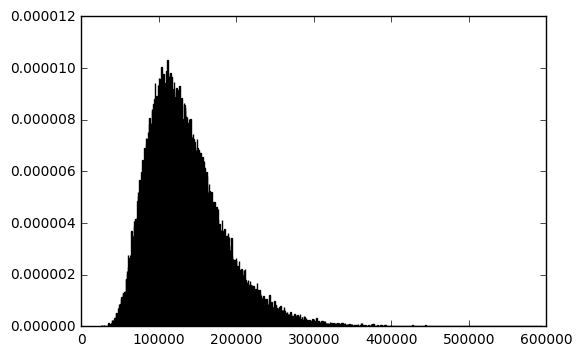

In [20]:
h = plt.hist(k, bins=1000, normed=True)
plt.show()

In [5]:
s = 0.5
len(k[(k < np.mean(k) + s*np.std(k)) & (k > np.mean(k) - s*np.std(k))])/len(k)

0.39841

In [6]:
w = np.random.randn(1e6) + 1.0

/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:1: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  if __name__ == '__main__':


In [7]:
len(w[(w < np.mean(w) + s*np.std(w)) & (w > np.mean(w) - s*np.std(w))])/len(w)

0.383982

In [8]:
st.skew(k)

1.1821659489374219

In [9]:
st.skew(w)

0.001704217374133532

In [10]:
st.describe(w)

DescribeResult(nobs=1000000, minmax=(-3.92328069152195, 5.6536070645431939), mean=1.0001476296488923, variance=1.0023580026522936, skewness=0.001704217374133532, kurtosis=0.006861448772837786)

In [11]:
a = np.random.randn(50, 50)

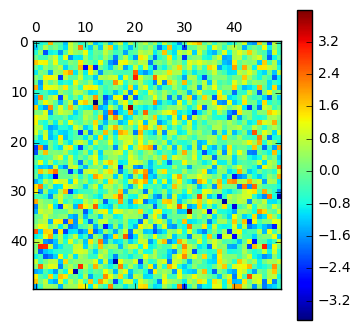

In [12]:
plt.matshow(a)
plt.colorbar()
plt.show()

In [15]:
import matplotlib as mp

In [16]:
mp.__version__

'1.5.3'